In [1]:
from functools import partial
from matplotlib.legend_handler import HandlerLine2D


from pathlib import Path
location = 'ca'

path = Path(location)

from joblib import Memory
memory = Memory(path, verbose=1)

from routines import classic_game, comparing_planning_game, comparing_receding_game 
import numpy as np 
from scipy.optimize import *

import matplotlib.pyplot as plt
import seaborn as sns

from parameters import *
from models.game_theory_model import *
from models.game import *
from utility.array_to_latex import array_to_latex
from itertools import product

from matplotlib import ticker
M=4

from ipywidgets import interact

from plot_param import *


temperature_target = None
final_multiplier = 0

case = 'sigmoid'

horizon = 2100

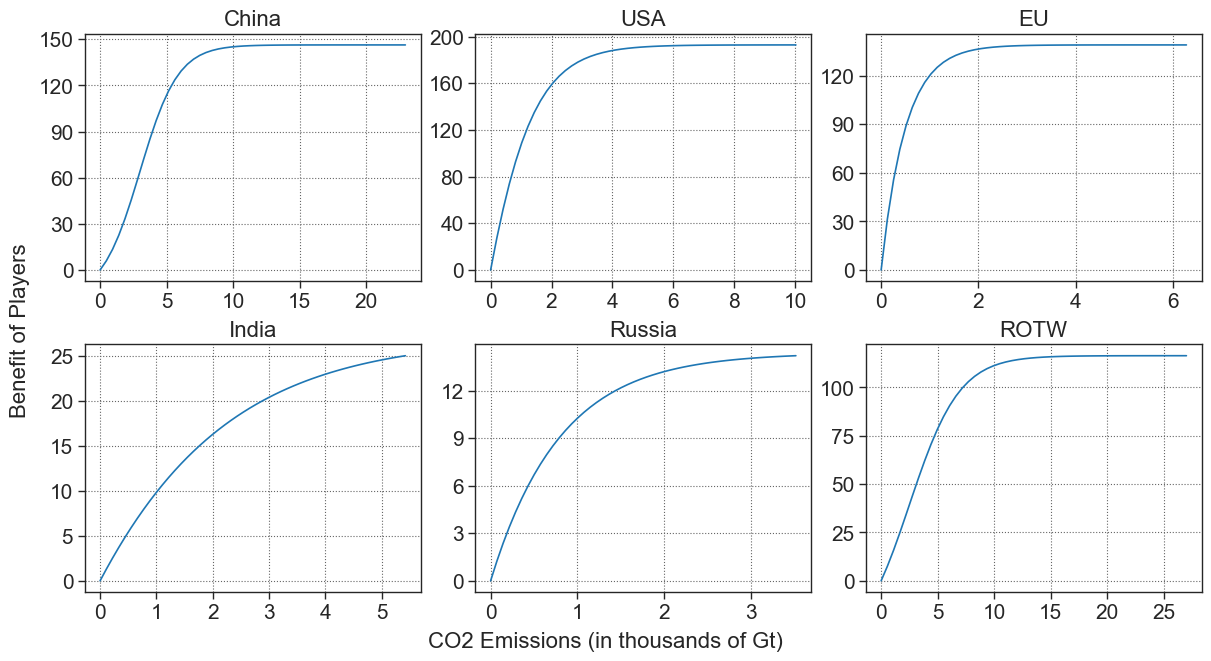

In [55]:
r = [1.15, 1.60, 2, 0.5, 1.25,0.75]
e = [2, -2, -5, -4, -5, 2.5]

# Action set doubled
plt.rcParams["figure.autolayout"] = True

r = [0.70, 1, 2, 0.5, 1.25,0.45]
e = [3, -1, -5, -4, -5, 2.5]

list_benef = [partial(benefit_sigm, e=e[i], r = r[i]) for i in range(len(BENEFITS_SIGMOID))]

fig, axes = plt.subplots(2, 3, figsize=(12,6.5), layout="constrained", dpi=100)
list_players = create_players(list_benefit_functions=list_benef)
M = 6

from matplotlib import ticker
# fig.tight_layout()
for k, ax in enumerate(axes.flat):
    player = list_players[k]
    x = np.linspace(*player.action_set[0])
    xticks = ticker.MaxNLocator(M, integer=True)
    yticks = ticker.MaxNLocator(M, integer=True)

    ax.plot(x, player.benefit(x, t=0))
    ax.set_title('{}'.format(NAMES[k]))
    ax.xaxis.set_major_locator(xticks)
    ax.yaxis.set_major_locator(yticks)


fig.supylabel(r'Benefit of Players',fontsize='medium',)
fig.supxlabel(r'CO2 Emissions (in thousands of Gt)',fontsize='medium')

plt.savefig(fname="journal/Benefits_{}.pdf".format(case), format='pdf')
plt.show()

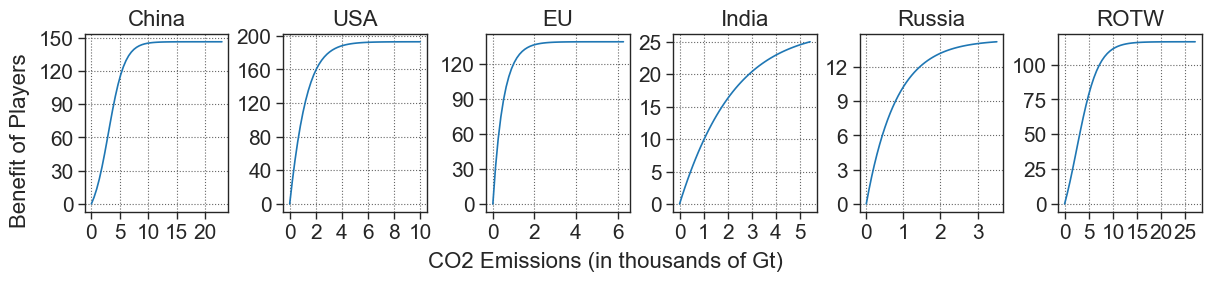

In [ ]:
r = [1.15, 1.60, 2, 0.5, 1.25,0.75]
e = [2, -2, -5, -4, -5, 2.5]

# Action set doubled
plt.rcParams["figure.autolayout"] = True

r = [0.70, 1, 2, 0.5, 1.25,0.45]
e = [3, -1, -5, -4, -5, 2.5]

list_benef = [partial(benefit_sigm, e=e[i], r = r[i]) for i in range(len(BENEFITS_SIGMOID))]

fig, axes = plt.subplots(1, 6, figsize=(12,2.7), layout="constrained", dpi=100)
list_players = create_players(list_benefit_functions=list_benef)
M = 6

from matplotlib import ticker
# fig.tight_layout()
for k, ax in enumerate(axes.flat):
    player = list_players[k]
    x = np.linspace(*player.action_set[0])
    xticks = ticker.MaxNLocator(M, integer=True)
    yticks = ticker.MaxNLocator(M, integer=True)

    ax.plot(x, player.benefit(x, t=0))
    ax.set_title('{}'.format(NAMES[k]))
    ax.xaxis.set_major_locator(xticks)
    ax.yaxis.set_major_locator(yticks)


fig.supylabel(r'Benefit of Players',fontsize='medium',)
fig.supxlabel(r'CO2 Emissions (in thousands of Gt)',fontsize='medium')

plt.savefig(fname="journal/Benefits_{}.pdf".format(case), format='pdf')
plt.show()

In [30]:
import matplotlib.rcsetup